<a href="https://colab.research.google.com/github/RitwickSV/Neural-Networks/blob/main/IMDB_Movie_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary packages




In [15]:
import numpy as np
import keras
from keras import models, layers
from keras.datasets import imdb

# Import Data

In [16]:
#Keeps only the top 10000 most occurring words in the vector form so it is easy for processing
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words = 10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

# Understanding the data

In [17]:
print(train_data[0])
print(len(train_data))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
25000


This data contains the words which are hot encoded to have the review stored.
We can also obtain the original review from the data we have.

In [18]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

# Preparing data to be fit into the model

The train_data, contains the numbers corresponding to the sequences of the words and the train_labels contain 0 or 1 to state whether the review is negative or positive. Let's hot encode the input so that they are converted into tensors.
We can either
*   Pad all the samples in the train data and make them equal length or 
*   One hot encode all the data into vectors.

Let's choose the 2nd option.



In [19]:
def words2vectors(reviews, dimension = 10000):
    data = np.zeros((len(reviews), dimension))
    for i, review in enumerate(reviews):
        data[i,review] = 1
    return data

x_train = words2vectors(train_data)
x_test = words2vectors(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [20]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


# Building the Model

We build our model using 2 hidden layers with 16 units each and a final layer which gives us the output.

We are using the relu activation function for the hidden layers, which nullifies all the values below zeros and the sigmoid function to the output layer which gives us the probability of each of the occurrence of the output. 

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = ((10000,))))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


# Compile the model

We will be using the rmsprop optimiser and the binary_crossentropy since this is just a 2 class classification problem

In [22]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Let's set aside a validation set before we test.

In [23]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [24]:
model_summary = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 15s 41ms/step - loss: 0.5796 - accuracy: 0.7055 - val_loss: 0.3741 - val_accuracy: 0.8615
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3052 - accuracy: 0.9035 - val_loss: 0.2978 - val_accuracy: 0.8900
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2180 - accuracy: 0.9289 - val_loss: 0.3281 - val_accuracy: 0.8652
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1686 - accuracy: 0.9461 - val_loss: 0.2794 - val_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1342 - accuracy: 0.9578 - val_loss: 0.2847 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1080 - accuracy: 0.9688 - val_loss: 0.3087 - val_accuracy: 0.8816
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0933 - accuracy: 0.9726 - val_loss: 0.3484 - val_accuracy: 0.8758
Epoch 8/20
3

# Plotting to find the best epoch value

The `model_summary` value contains a parameter history which has the values of the loss and accuracy of the training and the validation. We will be using the parameters to attain the optimised value of the epoch for building the model.

In [25]:
history_dict = model_summary.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


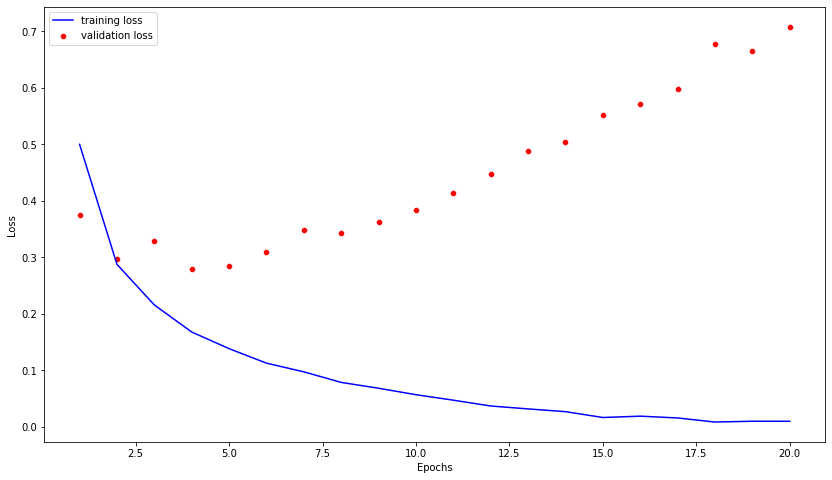

In [34]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize = (14,8))
sns.lineplot(x = epochs, y = loss_values, color = 'blue', label = 'training loss')
sns.scatterplot(x = epochs, y = val_loss_values, color = 'red', label = 'validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

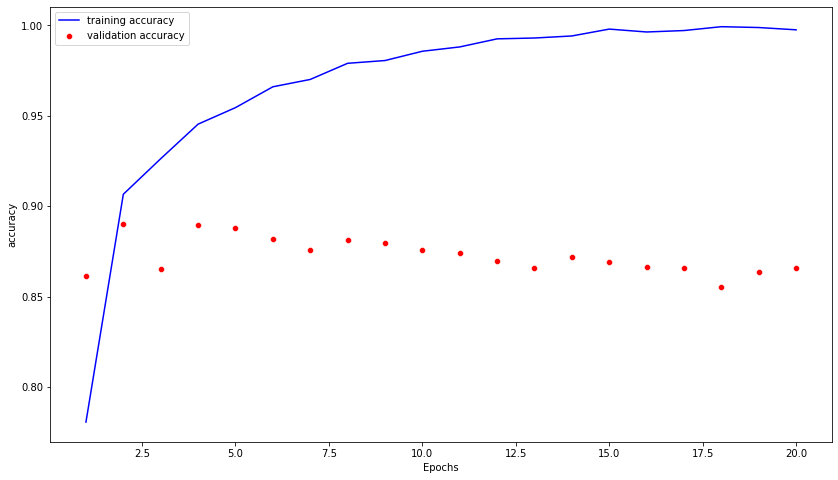

In [36]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

plt.figure(figsize = (14,8))
sns.lineplot(x = epochs, y = acc_values, color = 'blue', label = 'training accuracy')
sns.scatterplot(x = epochs, y = val_acc_values, color = 'red', label = 'validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.show()

We can see that the loss starts increasing and the accuracy starts decreasing from around after the 4th epoch for the validation data.

Hence, we can build our model afresh using the epoch value to be 4.

In [37]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = ((10000,))))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs = 4, batch_size = 512, validation_data=(x_val,y_val))


Epoch 1/4
30/30 [==============================] - 2s 48ms/step - loss: 0.5924 - accuracy: 0.6985 - val_loss: 0.3939 - val_accuracy: 0.8710
Epoch 2/4
30/30 [==============================] - 1s 22ms/step - loss: 0.3324 - accuracy: 0.9023 - val_loss: 0.3323 - val_accuracy: 0.8724
Epoch 3/4
30/30 [==============================] - 1s 22ms/step - loss: 0.2381 - accuracy: 0.9287 - val_loss: 0.2931 - val_accuracy: 0.8847
Epoch 4/4
30/30 [==============================] - 1s 22ms/step - loss: 0.1821 - accuracy: 0.9469 - val_loss: 0.2842 - val_accuracy: 0.8877


In [38]:
result = model.evaluate(x_test,y_test) #to evaluate the prediction capacity of our model on the test data.
print(result)

782/782 [==============================] - 1s 1ms/step - loss: 0.3003 - accuracy: 0.8784
[0.30030348896980286, 0.8784000277519226]


We can use different activation functions in the hidden layers, or increase the units or the hidden layers in our model and experiment with various types of losses to find if there is any model with more accuracy